## Análise de Classificação Genética


Os dados de metagenômica provenientes de amostras coletadas de pacientes com doenças inflamatórias intestinais (arquivo amostras.tsv) foram analisados com o objetivo de identificar a presença de genes associados ao metabolismo de ácidos siálicos (arquivo dados_genes.tsv). A partir disso, foram utilizados modelos de aprendizado de máquina para investigar a possível associação entre a presença desse conjunto específico de genes e as condições clínicas observadas nos pacientes.

### Tratamento inicial dos dados

In [ ]:
# importando arquivos

from google.colab import files
uploaded = files.upload()

Saving amostras_unificadas.tsv to amostras_unificadas.tsv


In [ ]:
import pandas as pd

In [ ]:
# carregando a realação amostra x condição em um DataFrame Pandas

condicoes = pd.read_csv('amostras.tsv', sep='\t') # o separador padrão de arquivo csv é a vírgula, mas o arquivo tsv é separado por tabulações (\t)
condicoes.head()

,Individual,Condition
0,SKST006,IBD
1,SKST007,Control
2,SKST010,Control
3,SKST011,Control
4,SKST012,Control


In [ ]:
# carregando a realação amostra x genes em um DataFrame Pandas

genes = pd.read_csv('dados_genes.tsv', sep='\t')
genes = genes.rename(columns={'Unnamed: 0' : "Individual"}) # nomeando a coluna referente as amostras da mesma maneira que no DataFrame anterior
genes.head()

# aqui, 0 representa a ausência do gene na amostra e 1 a presença

,Individual,KpsC,KpsD,KpsE,KpsF,KpsS,KpsU,Lic3A,Lic3B,Lst,...,NeuO,NeuS,SatA,SatB,SatC,SatD,SiaP,SiaQ,SiaT,SOAT
0,SKST041,0,1,0,1,0,1,1,1,0,...,1,0,1,1,1,1,1,0,1,1
1,SKST037,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,0,1,1
2,SKST036,1,1,0,1,1,1,1,1,0,...,1,0,1,1,1,1,1,0,1,1
3,SKST032,1,1,0,1,1,1,1,1,0,...,1,0,1,1,1,1,1,0,1,1
4,SKST027,0,1,1,1,0,1,1,1,0,...,1,0,1,1,1,1,1,1,1,1


In [ ]:
# unindo as informações dos dois DataFrames em um só

dados = pd.merge(genes, condicoes, on='Individual')
dados.head()

,Individual,KpsC,KpsD,KpsE,KpsF,KpsS,KpsU,Lic3A,Lic3B,Lst,...,NeuS,SatA,SatB,SatC,SatD,SiaP,SiaQ,SiaT,SOAT,Condition
0,SKST041,0,1,0,1,0,1,1,1,0,...,0,1,1,1,1,1,0,1,1,Control
1,SKST037,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,0,1,1,Control
2,SKST036,1,1,0,1,1,1,1,1,0,...,0,1,1,1,1,1,0,1,1,Control
3,SKST032,1,1,0,1,1,1,1,1,0,...,0,1,1,1,1,1,0,1,1,IBD
4,SKST027,0,1,1,1,0,1,1,1,0,...,0,1,1,1,1,1,1,1,1,IBD


In [ ]:
dados['Condition'] = dados['Condition'].str.strip() # removendo espaços em branco das strings da coluna 'Condition'
dados['Condition'] = dados['Condition'].replace('Control', 'control') # unificando nomenclatura

In [ ]:
# análise prévia dos dados direcionou a utilizar apenas dados de amostras com as condições UC e CD

dados = dados[~dados['Condition'].isin(['IBD', 'AB-', 'AB+', 'diarrheaCDI-', 'CDI+'])] # retirando dados de má qualidade

In [ ]:
# visualizando se a operação anterior foi bem sucedida

pd.set_option("display.max_rows", None)
dados

,Individual,KpsC,KpsD,KpsE,KpsF,KpsS,KpsU,Lic3A,Lic3B,Lst,...,NeuS,SatA,SatB,SatC,SatD,SiaP,SiaQ,SiaT,SOAT,Condition
0,SKST041,0,1,0,1,0,1,1,1,0,...,0,1,1,1,1,1,0,1,1,control
1,SKST037,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,0,1,1,control
2,SKST036,1,1,0,1,1,1,1,1,0,...,0,1,1,1,1,1,0,1,1,control
6,SKST024,0,1,1,1,0,1,1,1,0,...,0,1,1,1,1,1,1,1,1,control
7,SKST023,0,1,0,1,0,1,1,1,0,...,0,1,1,1,1,1,1,1,1,control
9,SKST012,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,0,1,1,control
10,SKST011,1,1,1,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,1,control
11,SKST010,1,1,1,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,1,control
12,SKST007,1,1,0,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,1,control
14,p9281,1,1,1,1,1,1,1,1,0,...,0,1,1,1,1,1,0,1,1,control


### Escolhendo método de análise

In [ ]:
# visualizando número de amostras

num_amostras = len(dados)
num_control = len(dados[dados['Condition'] == 'control'])
num_uc = len(dados[dados['Condition'] == 'UC'])
num_cd = len(dados[dados['Condition'] == 'CD'])

print(f'numero total de amostras = {num_amostras}')
print(f'numero de amostras de controle = {num_control}')
print(f'numero de amostras de UC = {num_uc}')
print(f'numero de amostras de CD = {num_cd}')

numero total de amostras = 332
numero de amostras de controle = 95
numero de amostras de UC = 73
numero de amostras de CD = 164


In [ ]:
num_genes = len(dados.columns) - 2 # retirando as colunas 'Individual' e 'Condition'
print(f'numero de genes = {num_genes}')

numero de genes = 29


In [ ]:
# Análise não é considerada de alta dimensionalidade, já que amostras >> genes

In [ ]:
# número maior de amostras de pacientes com CD (desbalanceado)

In [ ]:
# Regressão Logística (Logistic Regression): Funciona bem quando há uma relação linear entre as variáveis (genes) e a classe
# Não é o caso

In [ ]:
# Algoritmos como Random Forest e XGBoost geralmente lidam melhor com dados desbalanceados
# Support Vector Machine (SVM) funciona bem para problemas de classificação binária em espaços de alta dimensionalidade

In [ ]:
# Selecionados para teste:
# RandomForestClassifier
# XGBoost

### RandomForestClassifier

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
 # definindo as variáveis indepentes e dependente

 x = dados.drop(['Individual', 'Condition'], axis=1) # variáveis independentes = genes
 y = dados['Condition'] # variável dependente = condição

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0) # dividindo os dados em teste e treinamento

In [ ]:
modelo_rfc = RandomForestClassifier(random_state=0)

In [ ]:
# aplicando GridSearchCV para encontrar melhores parâmetros

param_grid = {'n_estimators': [100, 200],
              'class_weight': ['balanced', None, 'balanced_subsample'],
              'max_depth': [None, 10, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(estimator=modelo_rfc, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
print(f"Best n_estimators: {grid_search.best_params_}")

KeyboardInterrupt: 

In [ ]:
# criando modelo com os melhores parâmetros encontrados e ajustando ao conjunto de dados

rfc_ajustado = RandomForestClassifier(n_estimators=200, random_state=0, class_weight='balanced_subsample', max_depth=None, min_samples_leaf=4, min_samples_split=10)
rfc_ajustado.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=200, random_state=0)

In [ ]:
# calculando acurácia do modelo

from sklearn.metrics import accuracy_score

y_pred = rfc_ajustado.predict(x_test)
accuracy_score(y_test, y_pred)

0.42168674698795183

In [ ]:
# Relatório completo com precisão, recall e F1 para cada classe

from sklearn.metrics import classification_report

print("\nRelatório completo de classificação:\n")
print(classification_report(y_test, y_pred))


Relatório completo de classificação:

              precision    recall  f1-score   support

          CD       0.57      0.48      0.52        44
          UC       0.32      0.50      0.39        18
     control       0.28      0.24      0.26        21

    accuracy                           0.42        83
   macro avg       0.39      0.41      0.39        83
weighted avg       0.44      0.42      0.42        83



In [ ]:
# precision(precisão) mede a quantidade de previsões corretas feitas pelo modelo em relação ao total de previsões positivas
# recall(sensibilidade) mede a fração de positivos reais que o modelo consegue identificar corretamente
# F1-Score é uma métrica do equilíbrio entre precisão e recall

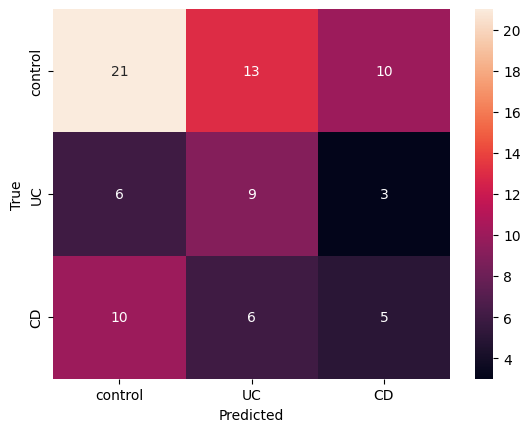

In [ ]:
# calculando a matriz de confusão

cm = confusion_matrix(y_test,y_pred)
classes = dados['Condition'].unique()

# plotando a matriz de confusão usando seaborn
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Melhorando a estimativa de performance do modelo com validação cruzada

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# validação cruzada com 5 folds
scores = cross_val_score(rfc_ajustado, x, y, cv=5)

# Média e desvio padrão da acurácia
print(f'Acurácia média: {scores.mean():.3f}')
print(f'Desvio padrão: {scores.std():.3f}')

Acurácia média: 0.404
Desvio padrão: 0.065


In [ ]:
# A validação cruzada geralmente oferece uma avaliação mais realista do desempenho
# do modelo, enquanto o modelo original pode ter sido otimizado ou ajustado para
# um único conjunto de dados de treino e teste, o que pode inflar sua acurácia.

In [ ]:
# avaliando as importâncias das variáveis no modelo

importances = rfc_ajustado.feature_importances_
feature_names = x.columns  # Ou use X.columns se for um DataFrame pandas
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# ordenando as variáveis por importância
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

   Feature  Importance
12    NanC    0.189781
2     KpsE    0.154522
4     KpsS    0.096066
0     KpsC    0.087001
25    SiaP    0.083412
15    NeuA    0.081259
26    SiaQ    0.072902
18    NeuD    0.064213
1     KpsD    0.055653
17    NeuC    0.036128
20    NeuS    0.019589
27    SiaT    0.019455
6    Lic3A    0.018592
11    NanA    0.005921
16    NeuB    0.005772
21    SatA    0.005425
19    NeuO    0.003804
7    Lic3B    0.000505
22    SatB    0.000000
24    SatD    0.000000
23    SatC    0.000000
14    NanK    0.000000
13    NanE    0.000000
10    NagB    0.000000
9     NagA    0.000000
8      Lst    0.000000
5     KpsU    0.000000
3     KpsF    0.000000
28    SOAT    0.000000


In [ ]:
# NanC (enzima catabólica) tem maior importância no ajuste do modelo

### XGBoost

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [ ]:
# é necessário convertes os rótulos do formato de string para forma numérica para usar XGBoost

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_encoded = label_encoder.transform(y)

In [ ]:
model_xgb = xgb.XGBClassifier(random_state=0)

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9],
    'gamma': [0, 0.1, 0.2]}

grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid_xgb, cv=5, error_score='raise')
grid_search_xgb.fit(x_train, y_train_encoded)
print(f"Best n_estimators: {grid_search_xgb.best_params_}")

Best n_estimators: {'colsample_bytree': 0.9, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.5}


In [ ]:
# criando modelo com os melhores parâmetros encontrados e ajustando ao conjunto de dados

xgb_ajustado = xgb.XGBClassifier(random_state=0, colsample_bytree= 0.9, gamma= 0.2, learning_rate= 0.05, max_depth= 5, min_child_weight= 5, n_estimators= 100, subsample= 0.5)
xgb_ajustado.fit(x_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# calculando acurácia do modelo

from sklearn.metrics import accuracy_score

y_pred_xgb = xgb_ajustado.predict(x_test)
accuracy_score(y_test_encoded, y_pred_xgb)

0.4819277108433735

In [ ]:
# Relatório completo com precisão, recall e F1 para cada classe

print("\nRelatório completo de classificação:\n")
print(classification_report(y_test_encoded, y_pred_xgb))


Relatório completo de classificação:

              precision    recall  f1-score   support

           0       0.55      0.84      0.67        44
           1       0.00      0.00      0.00        18
           2       0.21      0.14      0.17        21

    accuracy                           0.48        83
   macro avg       0.26      0.33      0.28        83
weighted avg       0.35      0.48      0.40        83



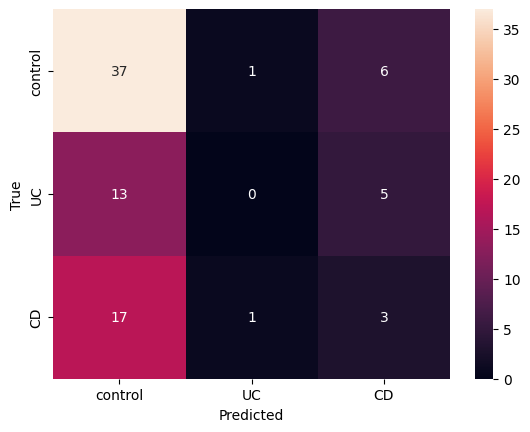

In [ ]:
# calculando a matriz de confusão

cm_xgb = confusion_matrix(y_test_encoded,y_pred_xgb)
classes = dados['Condition'].unique()

# plotando a matriz de confusão usando seaborn
sns.heatmap(cm_xgb, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# validação cruzada com 5 folds
scores_xgb = cross_val_score(xgb_ajustado, x, y_encoded, cv=5)

# Média e desvio padrão da acurácia
print(f'Acurácia média: {scores_xgb.mean():.3f}')
print(f'Desvio padrão: {scores_xgb.std():.3f}')

Acurácia média: 0.446
Desvio padrão: 0.044


### Avaliando se a presença de genes de alguma via específica se relaciona com as condições

In [ ]:
genes_anabolismo = dados[['KpsC', 'KpsD', 'KpsE', 'KpsS', 'KpsU', 'Lic3A', 'Lic3B', 'Lst', 'NeuA', 'NeuB', 'NeuC', 'NeuD', 'NeuO', 'NeuS']]
genes_anabolismo.head()

,KpsC,KpsD,KpsE,KpsS,KpsU,Lic3A,Lic3B,Lst,NeuA,NeuB,NeuC,NeuD,NeuO,NeuS
0,0,1,0,0,1,1,1,0,1,1,1,1,1,0
1,1,1,1,1,1,1,1,0,1,1,1,1,1,1
2,1,1,0,1,1,1,1,0,1,1,1,1,1,0
6,0,1,1,0,1,1,1,0,1,1,1,1,1,0
7,0,1,0,0,1,1,1,0,1,1,1,1,1,0


In [ ]:
genes_catabolismo = dados[['NagA', 'NagB', 'NanA', 'NanC', 'NanE', 'NanK']]
genes_catabolismo.head()

,NagA,NagB,NanA,NanC,NanE,NanK
0,1,1,1,0,1,1
1,1,1,1,1,1,1
2,1,1,1,0,1,1
6,1,1,1,0,1,1
7,1,1,1,0,1,1


In [ ]:
genes_transporte = dados[['SatA', 'SatB', 'SatC', 'SatD', 'SiaP', 'SiaQ', 'SiaT']]
genes_transporte.head()

,SatA,SatB,SatC,SatD,SiaP,SiaQ,SiaT
0,1,1,1,1,1,0,1
1,1,1,1,1,1,0,1
2,1,1,1,1,1,0,1
6,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1


In [ ]:
# Aplicando o modelo rfc para cada um dos conjuntos de dados
# x sendo o data frame com os genes e y o data frame com as condições (previamente definido)

In [ ]:
x_train_a, x_test_a, y_train_a, y_test_a = train_test_split(genes_anabolismo, y, random_state=0)
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(genes_catabolismo, y, random_state=0)
x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(genes_transporte, y, random_state=0)

#### Aplicando RandomForestClassifier para via de anabolismo



Acurácia média (anabolismo): 0.377
Desvio padrão (anabolismo): 0.027


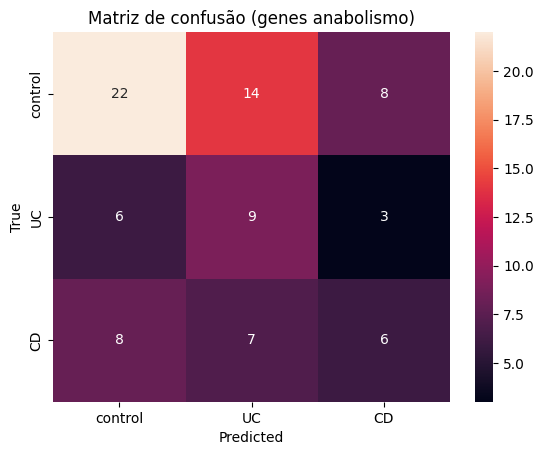

In [ ]:
rfc_ajustado.fit(x_train_a, y_train_a)
scores_a = cross_val_score(rfc_ajustado, genes_anabolismo, y, cv=5)
print(f'Acurácia média (anabolismo): {scores_a.mean():.3f}')
print(f'Desvio padrão (anabolismo): {scores_a.std():.3f}')

y_pred_a = rfc_ajustado.predict(x_test_a)

cm_a = confusion_matrix(y_test_a,y_pred_a)
classes = dados['Condition'].unique()

# plotando a matriz de confusão usando seaborn
hpa = sns.heatmap(cm_a, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
hpa.set_title('Matriz de confusão (genes anabolismo)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Aplicando RandomForestClassifier para via de catabolismo

Acurácia média (catabolismo): 0.386
Desvio padrão (catabolismo): 0.094


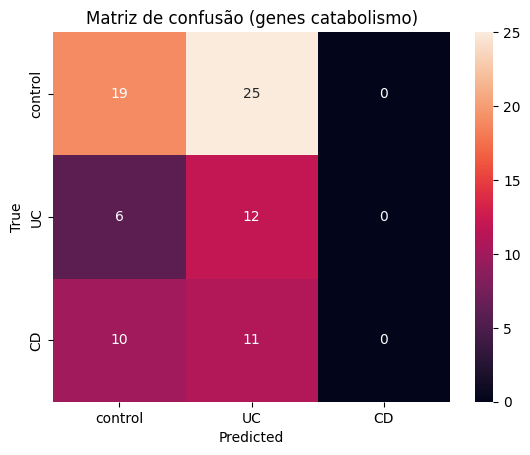

In [ ]:
rfc_ajustado.fit(x_train_c, y_train_c)
scores_c = cross_val_score(rfc_ajustado, genes_catabolismo, y, cv=5)
print(f'Acurácia média (catabolismo): {scores_c.mean():.3f}')
print(f'Desvio padrão (catabolismo): {scores_c.std():.3f}')

y_pred_c = rfc_ajustado.predict(x_test_c)

cm_c = confusion_matrix(y_test_c,y_pred_c)
classes = dados['Condition'].unique()

# plotando a matriz de confusão usando seaborn
hpa = sns.heatmap(cm_c, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
hpa.set_title('Matriz de confusão (genes catabolismo)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Aplicando RandomForestClassifier para enzimas de transporte

Acurácia média (transporte): 0.283
Desvio padrão (transporte): 0.072


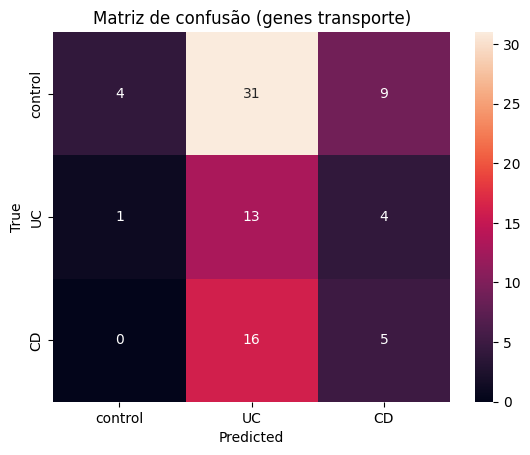

In [ ]:
rfc_ajustado.fit(x_train_t, y_train_t)
scores_t = cross_val_score(rfc_ajustado, genes_transporte, y, cv=5)
print(f'Acurácia média (transporte): {scores_t.mean():.3f}')
print(f'Desvio padrão (transporte): {scores_t.std():.3f}')

y_pred_t = rfc_ajustado.predict(x_test_t)

cm_t = confusion_matrix(y_test_t,y_pred_t)
classes = dados['Condition'].unique()

# plotando a matriz de confusão usando seaborn
hpa = sns.heatmap(cm_t, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
hpa.set_title('Matriz de confusão (genes transporte)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()